# Klasifikasi Sederhana

##### Klasifikasi ini dibentuk dengan fungsi regresi (perception)

In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np
 
import matplotlib.pyplot as plt
%matplotlib inline
 
from pandas import get_dummies

mnist = tf.keras.datasets.mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()

print(test_features.shape)

(10000, 28, 28)


In [2]:
image_1 = train_features[0,:,:]
image_1

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

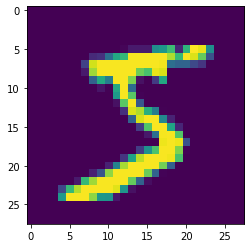

In [3]:
plt.imshow(image_1)

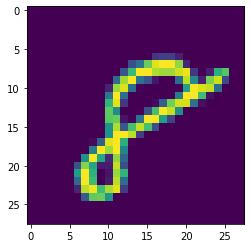

In [4]:
image_last = train_features[-1,:,:]
plt.imshow(image_last)

In [5]:
print(np.max(image_1,axis=0))

[  0   0   0   0 136 253 253 253 253 253 253 253 253 253 253 253 253 253
 253 249 253 255 247 127   0   0   0   0]


In [6]:
train_features, test_features = train_features / 255.0, test_features / 255.0
#print(train_features)
image_1_normalize = train_features[0,:,:]
print(np.max(image_1_normalize,axis=0))

[0.         0.         0.         0.         0.53333333 0.99215686
 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686
 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686
 0.99215686 0.97647059 0.99215686 1.         0.96862745 0.49803922
 0.         0.         0.         0.        ]


In [7]:
x = tf.reshape(train_features, [60000, 784])
x = tf.Variable(x)
x = tf.cast(x, tf.float32) #cast tipe float

y_hot = get_dummies(train_labels) 
y = y_hot.values

Number_of_features = 784
Number_of_units = 10
weight = tf.Variable(tf.zeros([Number_of_features, Number_of_units]))  
bias = tf.Variable(tf.zeros([Number_of_units]))

In [8]:
def perceptron(x):
    z = tf.add(tf.matmul(x,weight),bias)
    output = tf.nn.softmax(z)
    return output

#compiling
optimizer = tf.optimizers.Adam(.01)
def train(i):
    for n in range(i):
        loss=lambda: abs(tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=perceptron(x))))
        optimizer.minimize(loss, [weight, bias])

train(1000)

In [9]:
#evaluasi
test = tf.reshape(test_features, [10000, 784])
 
test = tf.Variable(test) 
test = tf.cast(test, tf.float32) 

test_hot = get_dummies(test_labels) 
test_matrix = test_hot.values

#prediksi
ypred = perceptron(test) 
ypred = tf.round(ypred)

print(accuracy_score(test_hot, ypred))

0.9304
